# QuTiP example: Pseudo-probability functions

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
import numpy as np

In [3]:
from qutip import *

## Wigner function for superposition of fock states

$x = \frac{1}{\sqrt{2}}(\psi_0 +\psi_1)$

In [4]:
x = 1.0 / np.sqrt(2) * (basis(10, 4) + basis(10, 2))
xvec = np.arange(-5, 5, 10.0 / 100)
yvec = xvec
W = wigner(x, xvec, yvec)
cmap = wigner_cmap(W)
X, Y = np.meshgrid(xvec, yvec)

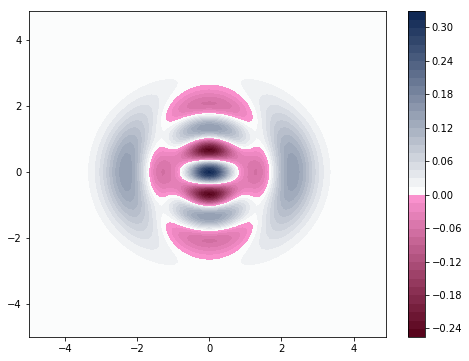

In [5]:
fig = plt.figure(figsize=(8,6))
plt.contourf(X, Y, W, 50, cmap=cmap)
plt.colorbar();

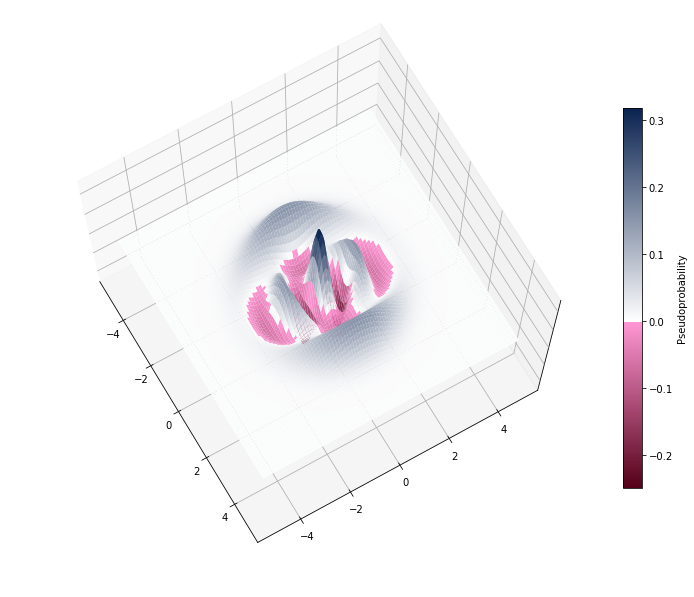

In [10]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig, azim=-30, elev=73)
ax.plot_surface(X, Y, W, cmap=cmap, rstride=1, cstride=1, alpha=1, linewidth=0)
ax.set_zlim3d(-0.25, 0.25)
for a in ax.w_zaxis.get_ticklines() + ax.w_zaxis.get_ticklabels():
    a.set_visible(False)
nrm = mpl.colors.Normalize(W.min(), W.max())
cax, kw = mpl.colorbar.make_axes(ax, shrink=.66, pad=.02)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=nrm)
cb1.set_label('Pseudoprobability')

## Winger and Q-function for squeezed states

In [12]:
N = 20
alpha = -1.0 # Coherent amplitude of field
epsilon = 0.5j # Squeezing parameter 
a = destroy(N)

D = (alpha * a.dag() - np.conj(alpha) * a).expm()  # Displacement
S = (0.5 * np.conj(epsilon) * a * a - 0.5 * epsilon * a.dag() * a.dag()).expm()  # Squeezing
psi = D * S * basis(N, 0)  # Apply to vacuum state
g = 2

### Wigner function

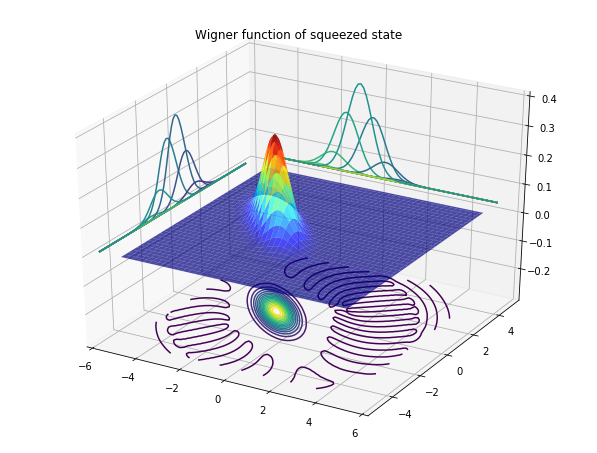

In [13]:
xvec = np.arange(-40.,40.)*5./40
X,Y = np.meshgrid(xvec, xvec)

W = wigner(psi, xvec, xvec)

fig1 = plt.figure(figsize=(8,6))
ax = Axes3D(fig1)
ax.plot_surface(X, Y, W, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, W, 15,zdir='x', offset=-6)
ax.contour(X, Y, W, 15,zdir='y', offset=6)
ax.contour(X, Y, W, 15,zdir='z', offset=-0.3)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title('Wigner function of squeezed state');

### Q-function

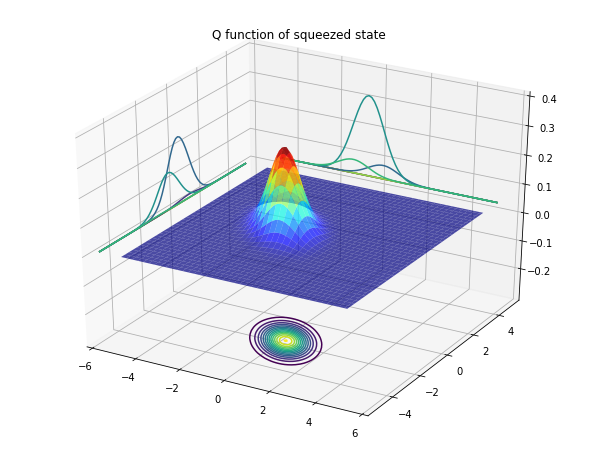

In [14]:
Q = qfunc(psi, xvec, xvec, g);

fig2 = plt.figure(figsize=(8,6))
ax = Axes3D(fig2)
ax.plot_surface(X, Y, Q, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
ax.contour(X, Y, Q,zdir='x', offset=-6)
ax.contour(X, Y, Q,zdir='y', offset=6)
ax.contour(X, Y, Q, 15,zdir='z', offset=-0.4)
ax.set_xlim3d(-6,6)
ax.set_xlim3d(-6,6)
ax.set_zlim3d(-0.3,0.4)
plt.title('Q function of squeezed state');

## Schrodinger cat state

In [15]:
N = 20;
#amplitudes of coherent states
alpha1=-2.0-2j
alpha2=2.0+2j
#define ladder oeprators
a = destroy(N);
#define displacement oeprators
D1=(alpha1*dag(a)-np.conj(alpha1)*a).expm()
D2=(alpha2*dag(a)-np.conj(alpha2)*a).expm()
#sum of coherent states
psi = np.sqrt(2)**-1*(D1+D2)*basis(N,0); # Apply to vacuum state

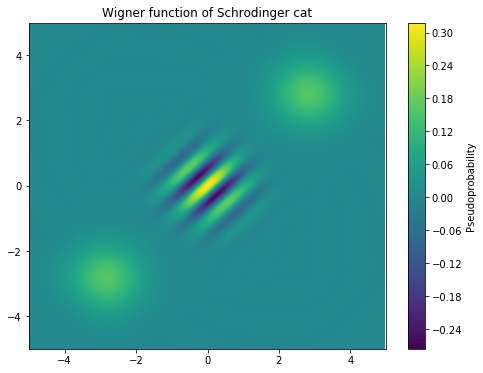

In [16]:
#calculate Wigner function
yvec = xvec = np.arange(-100.,100.)*5./100
g=2.
W = wigner(psi, xvec, yvec)
fig = plt.figure(figsize=(8,6))
c = plt.contourf(xvec, yvec, np.real(W), 100)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title('Wigner function of Schrodinger cat')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel('Pseudoprobability');

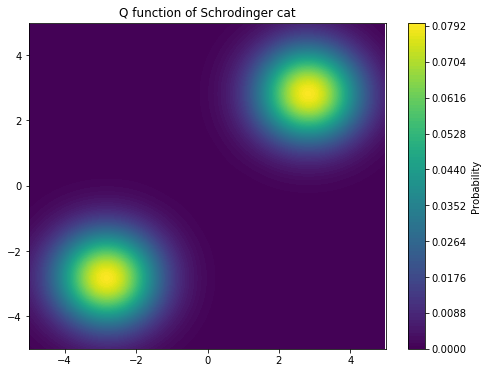

In [31]:
#calculate Q function
Q = qfunc(psi,xvec,yvec)
fig = plt.figure(figsize=(8,6))
qplt = plt.contourf(xvec, yvec, np.real(Q), 100)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.title('Q function of Schrodinger cat')
cbar = plt.colorbar(qplt)
cbar.ax.set_ylabel('Probability');

## Software version:

In [32]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.0.dev0+6e5b1d43
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.2 |Anaconda custom (x86_64)| (default, Jul 20 2017, 13:14:59) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
